The **CIS (Cultural Institute/Site and Cultural Event) ontology** aims at modelling the data on cultural institutes or sites such as data regarding the agents that play a specific role on cultural institutes or sites, the sites themselves, the contact points, all multimedia files which describe the cultural institute or site and any other information useful to the public in order to access the institute or site.

We specificially employed it to extract all the cultural events present in the dataset through the property **cis:CulturalEvent**

**cis:CulturalEvent** represents an event that typically is related to the cultural domain

In [7]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_events = """
PREFIX cis: <http://dati.beniculturali.it/cis/>
PREFIX arco: <https://w3id.org/arco/ontology/arco/>
PREFIX clvapit:<https://w3id.org/italia/onto/CLV/>

SELECT DISTINCT ?s  WHERE {
 ?s a cis:CulturalEvent.
 }
"""

In [8]:
df = sparql_dataframe.get(endpoint, query_events)

We procede getting the cultural events' names, through using the property, **rdfs:label**. We also kept the IRI in order to have a unique identifier both for institutes and sites that will help us to merge our tables.

In [9]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_event_label = """
PREFIX cis: <http://dati.beniculturali.it/cis/>
PREFIX arco: <https://w3id.org/arco/ontology/arco/>
PREFIX clvapit:<https://w3id.org/italia/onto/CLV/>

SELECT DISTINCT ?s ?event WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
}
"""

In [10]:
df = sparql_dataframe.get(endpoint, query_event_label)

We then employed the property **cis:isHostedBySite** to extract all the sites in which the events were held as this specific property links the Event to the Site of the Cultural Institute or Site.

Also in this case we actually extracted both the IRIs and the label through the same property as the one mentioned above.

In [11]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_site= """
PREFIX cis: <http://dati.beniculturali.it/cis/>
PREFIX arco: <https://w3id.org/arco/ontology/arco/>
PREFIX clvapit:<https://w3id.org/italia/onto/CLV/>

SELECT DISTINCT ?s ?event ?o ?site  WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
}
"""

In [12]:
df = sparql_dataframe.get(endpoint, query_site)

Then we examined various ways to retrieve the city of each city, examing the various predicates associated to them; the most appropriate and helpful way for us was to first extract the address through **cis:siteAddress** and then from here to get the city through the employment of another ontology (Address (Location) Ontology) and its property **clavpit:hasCity**.

In [13]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_culture_events = """
PREFIX cis: <http://dati.beniculturali.it/cis/>
PREFIX arco: <https://w3id.org/arco/ontology/arco/>
PREFIX clvapit:<https://w3id.org/italia/onto/CLV/>

SELECT DISTINCT ?s ?event ?o ?site ?urlcity ?city WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity rdfs:label ?city
}
"""

In [14]:
df = sparql_dataframe.get(endpoint, query_culture_events)

To further clear up this file from any duplicates that might appear we used the pandas method **drop_duplicates** in order to obtain a clearer table of all the data that we obtained together.

In [15]:
df=df.drop_duplicates(["s", "o"])

Finally we saved all of this data in a csv file to then reuse it for our own graph.

In [16]:
df.to_csv("cleancefile.csv")

Then we worked onto counting first the events per sites

In [2]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_site = """
PREFIX cis: <http://dati.beniculturali.it/cis/>
PREFIX arco: <https://w3id.org/arco/ontology/arco/>
PREFIX clvapit:<https://w3id.org/italia/onto/CLV/>

SELECT DISTINCT (count (?o) as ?count) ?site WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity rdfs:label ?city
}
"""

In [3]:
df_count_sites = sparql_dataframe.get(endpoint, query_site)

In [4]:
df_count_sites.to_csv("numbersite.csv")

Then the events per city.

In [31]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_city = """
PREFIX cis: <http://dati.beniculturali.it/cis/>
PREFIX arco: <https://w3id.org/arco/ontology/arco/>
PREFIX clvapit:<https://w3id.org/italia/onto/CLV/>

SELECT DISTINCT (count (?s) as ?count) ?city WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity rdfs:label ?city
}
"""

In [32]:
df_city = sparql_dataframe.get(endpoint, query_city)

In [33]:
df_city.to_csv("numbercity.csv")

In [15]:
endpoint = 'https://dati.cultura.gov.it/sparql'

query = '''
SELECT DISTINCT(?urlcity2) ?dbCity WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity owl:sameAs ?urlcity2.
?urlcity2 owl:sameAs ?dbCity. 
FILTER(contains (str(?dbCity), "dbpedia") )
}
'''

In [16]:
df = sparql_dataframe.get(endpoint, query)

In [17]:
df

,urlcity2,dbCity
0,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Besenello
1,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Calci
2,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Carmignano
3,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Cetona
4,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Chiusi
...,...,...
789,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Casalciprano
790,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Monterosso_Grana
791,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Castrocielo
792,http://dati.beniculturali.it/mibact/luoghi/res...,http://dbpedia.org/resource/Lu_e_Cuccaro_Monfe...


In [ ]:
from sparql_dataframe import get
endpoint = 'https://dati.cultura.gov.it/sparql'

#count of all the cities
query = '''
SELECT COUNT(DISTINCT(?urlcity) as ?count) WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
}
'''
CountCity = get(endpoint, query)
CountCity

After having extracted all the geographical information, we then moved onto working into the temporal one.

We did this through the employment of the **Time ontology** (Italian application profile) in the properties tiapit:atTime.

This actually gave us a time interval composed by a **start time** and **end time**, which were then explicited through the xsd format with the properties **tiapit:StartMonth** and **tiapit:EndMonth**.

In [3]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_time="""SELECT DISTINCT ?s ?time ?starttime ?endtime WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s tiapit:atTime ?time.
?time tiapit:startTime ?startTime;
tiapit:endTime ?endtime.
}"""

In [52]:
df_time = sparql_dataframe.get(endpoint, query_time)

Everything was saved in a csv file.

In [8]:
df.to_csv("time.csv")

Similarly as we had done with the geographical information we counted how many events through the years.

In [53]:
query_count_time ="""SELECT DISTINCT (count (?s) as ?count)  (year(xsd:dateTime(?starttime)) as ?StartYear) (year(xsd:dateTime(?endtime)) as ?EndYear) WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s tiapit:atTime ?time.
?time tiapit:startTime ?starttime;
tiapit:endTime ?entime.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
}"""

In [54]:
df_time_count = sparql_dataframe.get(endpoint, query_count_time)

As always it was saved in a csv file.

In [12]:
df.to_csv("time_count.csv")

Since it'd be difficult and troublesome to represent all the events per city, we worked onto getting the events per region and then to represent them in the most appropriate graph.

In [1]:
endpoint = 'https://dati.cultura.gov.it/sparql'

query_regions="""SELECT DISTINCT (count (?s) as ?count) ?region WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasRegion ?regionurl.
?regionurl rdfs:label ?region


}"""

In [4]:
df_region = sparql_dataframe.get(endpoint, query_regions)

In [5]:
df_region

,count,region
0,1857,Toscana
1,1389,Lombardia
2,4489,Lazio
3,813,Piemonte
4,1116,Emilia-Romagna
5,483,Basilicata
6,1006,Puglia
7,338,Abruzzo
8,2396,Campania
9,775,Umbria


/var/folders/qz/b4z_rj3s15jbrn1l_dv90b9c0000gn/T/ipykernel_2240/1500153003.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(5000.0, 0, '')]

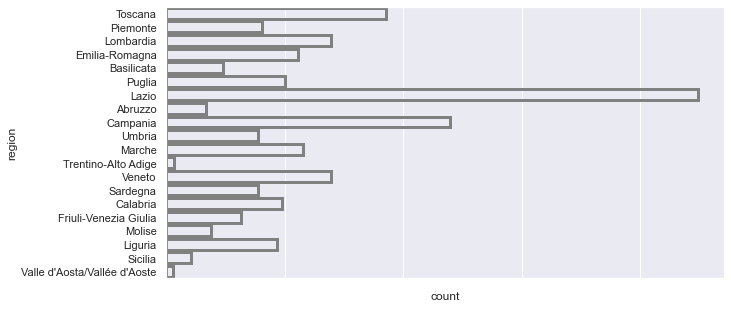

<Figure size 7200x504 with 0 Axes>

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
# sns.set_theme() in older versions of seaborn
sns.set()

# rename data frame
periods = df

# count function to show the number of observations of a category (period_label) in a dataset as a bar chart
# see documentation here https://seaborn.pydata.org/generated/seaborn.catplot.html
my_plot=sns.barplot(
    data=df_region, x="count", y="region",
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0), 
)
plt.figure(figsize=(100,7))
plt.rcParams["xtick.labelsize"] = 7

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [104]:
from sparql_dataframe import get
endpoint = 'https://dati.cultura.gov.it/sparql'

query_time_years="""SELECT DISTINCT ?s (year(xsd:dateTime(?starttime)) as ?StartYear) (year(xsd:dateTime(endtime)) as ?EndYear)WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s tiapit:atTime ?time.
?time tiapit:startTime ?starttime;
tiapit:endtime ?endtime.
}"""


In [105]:
df_start_end_time =  sparql_dataframe.get(endpoint, query_time_years)

In [86]:
df_start_end_time.head

<bound method NDFrame.head of                                                        s  StartYear  EndYear
0      http://dati.beniculturali.it/mibact/eventi/res...       2022     2022
1      http://dati.beniculturali.it/mibact/eventi/res...       2022     2022
2      http://dati.beniculturali.it/mibact/eventi/res...       2022     2022
3      http://dati.beniculturali.it/mibact/eventi/res...       2022     2022
4      http://dati.beniculturali.it/mibact/eventi/res...       2022     2022
...                                                  ...        ...      ...
21179  http://dati.beniculturali.it/mibact/eventi/res...       2023     2023
21180  http://dati.beniculturali.it/mibact/eventi/res...       2023     2023
21181  http://dati.beniculturali.it/mibact/eventi/res...       2023     2023
21182  http://dati.beniculturali.it/mibact/eventi/res...       2023     2023
21183  http://dati.beniculturali.it/mibact/eventi/res...       2023     2023

[21184 rows x 3 columns]>

In [159]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2023:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2023: 472}


In [161]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2022:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2022: 6068}


In [157]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2021:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2021: 4992}


In [160]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2020:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2020: 6808}


In [180]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2019:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2019: 2820}


In [181]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2018:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2018: 13}


In [182]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2017:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2017: 3}


In [183]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2016:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{}


In [184]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2015:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2015: 5}


In [185]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2014:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2014: 1}


In [186]:
counts = dict()
for i in df_start_end_time["StartYear"]:
    if i==2013:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2013: 1}


In [162]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2023:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2023: 615}


In [155]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2022:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2022: 6118}


In [158]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2021:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2021: 4983}


In [163]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2020:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2020: 6861}


In [171]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2019:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2019: 2585}


In [172]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2018:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2018: 13}


In [173]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2017:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2017: 2}


In [174]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2016:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2016: 1}


In [175]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2015:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2015: 4}


In [176]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2014:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{2014: 1}


In [178]:
counts = dict()
for i in df_start_end_time["EndYear"]:
    if i==2013:
        counts[i] = counts.get(i, 0) + 1
print(counts)

{}


In [231]:
counts = dict()
for index, row in df_start_end_time.iterrows():
    for i in df_start_end_time["StartYear"]:
        if i ==2022:
            counts[i] = counts.get(i, 0) + 1
print(counts)
   
    



{2022: 128544512}


In [2]:
from sparql_dataframe import get
import ssl
endpoint = 'https://dati.cultura.gov.it/sparql'
ssl._create_default_https_context = ssl._create_unverified_context

query = '''
SELECT DISTINCT (?s) ?region (year(xsd:dateTime(?StartMonth)) as ?StartYear) WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?s tiapit:atTime ?time.
?time tiapit:StartMonth ?StartMonth;
tiapit:EndMonth ?EndMonth.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasRegion ?regionurl.
?regionurl rdfs:label ?region


}
'''

EventsStart = get(endpoint, query)
EventsStart

,s,region,StartYear
0,http://dati.beniculturali.it/mibact/eventi/res...,Lazio,2022
1,http://dati.beniculturali.it/mibact/eventi/res...,Toscana,2022
2,http://dati.beniculturali.it/mibact/eventi/res...,Friuli-Venezia Giulia,2022
3,http://dati.beniculturali.it/mibact/eventi/res...,Lombardia,2022
4,http://dati.beniculturali.it/mibact/eventi/res...,Puglia,2022
...,...,...,...
21143,http://dati.beniculturali.it/mibact/eventi/res...,Piemonte,2022
21144,http://dati.beniculturali.it/mibact/eventi/res...,Toscana,2022
21145,http://dati.beniculturali.it/mibact/eventi/res...,Toscana,2022
21146,http://dati.beniculturali.it/mibact/eventi/res...,Toscana,2022


In [44]:


counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Lombardia":
        counts["2010Lombardia"] = counts.get("2010Lombardia", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Lombardia":
        counts["2011Lombardia"] = counts.get("2011Lombardia", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Lombardia":
        counts["2012Lombardia"] = counts.get("2012ombardia", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Lombardia":
        counts["2013Lombardia"] = counts.get("2013Lombardia", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Lombardia":
        counts["2014Lombardia"] = counts.get("2014Lombardia", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Lombardia":
        counts["2015Lombardia"] = counts.get("2015Lombardia", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Lombardia":
        counts["2016Lombardia"] = counts.get("2016Lombardia", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Lombardia":
        counts["2017Lombardia"] = counts.get("2017Lombardia", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Lombardia":
        counts["2018Lombardia"] = counts.get("2018Lombardia", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Lombardia":
        counts["2019Lombardia"] = counts.get("2019Lombardia", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Lombardia":
        counts["2020Lombardia"] = counts.get("2020Lombardia", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Lombardia":
        counts["2021Lombardia"] = counts.get("2021Lombardia", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Lombardia":
        counts["2022Lombardia"] = counts.get("2022Lombardia", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Lombardia":
        counts["2023Lombardia"] = counts.get("2023Lombardia", 0) + 1

print(counts)



{'2022Lombardia': 366, '2020Lombardia': 409, '2021Lombardia': 363, '2023Lombardia': 25, '2019Lombardia': 226}


In [10]:


counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Toscana":
        counts["2010Toscana"] = counts.get("2010Toscana", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Toscana":
        counts["2011Toscana"] = counts.get("2011Toscana", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Toscana":
        counts["2012Toscana"] = counts.get("2012Toscana", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Toscana":
        counts["2013Toscana"] = counts.get("2013Toscana", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Toscana":
        counts["2014Toscana"] = counts.get("2014Toscana", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Toscana":
        counts["2015Toscana"] = counts.get("2015Toscana", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Toscana":
        counts["2016Toscana"] = counts.get("2016Toscana", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Toscana":
        counts["2017Toscana"] = counts.get("2017Toscana", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Toscana":
        counts["2018Toscana"] = counts.get("2018Toscana", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Toscana":
        counts["2019Toscana"] = counts.get("2019Toscana", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Toscana":
        counts["2020Toscana"] = counts.get("2020Toscana", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Toscana":
        counts["2021Toscana"] = counts.get("2021Toscana", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Toscana":
        counts["2022Toscana"] = counts.get("2022Toscana", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Toscana":
        counts["2023Toscana"] = counts.get("2023Toscana", 0) + 1

print(counts)


{'2022Toscana': 613, '2020Toscana': 432, '2023Toscana': 62, '2018Toscana': 2, '2021Toscana': 442, '2019Toscana': 292, '2014Toscana': 1}


In [11]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Marche":
        counts["2010Marche"] = counts.get("2010Marche", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Marche":
        counts["2011Marche"] = counts.get("2011Marche", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Marche":
        counts["2012Marche"] = counts.get("2012Marche", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Marche":
        counts["2013Marche"] = counts.get("2013Marche", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Marche":
        counts["2014Marche"] = counts.get("2014Marche", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Marche":
        counts["2015Marche"] = counts.get("2015Marche", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Marche":
        counts["2016Marche"] = counts.get("2016Marche", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Marche":
        counts["2017Marche"] = counts.get("2017Marche", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Marche":
        counts["2018Marche"] = counts.get("2018Marche", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Marche":
        counts["2019Marche"] = counts.get("2019Marche", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Marche":
        counts["2020Marche"] = counts.get("2020Marche", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Marche":
        counts["2021Marche"] = counts.get("2021Marche", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Marche":
        counts["2022Marche"] = counts.get("2022Marche", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Marche":
        counts["2023Marche"] = counts.get("2023Marche", 0) + 1

print(counts)


{'2022Marche': 273, '2020Marche': 464, '2023Marche': 9, '2021Marche': 273, '2019Marche': 137}


In [12]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Lazio":
        counts["2010Lazio"] = counts.get("2010Lazio", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Lazio":
        counts["2011Lazio"] = counts.get("2011Lazio", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Lazio":
        counts["2012Lazio"] = counts.get("2012Lazio", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Lazio":
        counts["2013Lazio"] = counts.get("2013Lazio", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Lazio":
        counts["2014Lazio"] = counts.get("2014Lazio", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Lazio":
        counts["2015Lazio"] = counts.get("2015Lazio", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Lazio":
        counts["2016Lazio"] = counts.get("2016Lazio", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Lazio":
        counts["2017Lazio"] = counts.get("2017Lazio", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Lazio":
        counts["2018Lazio"] = counts.get("2018Lazio", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Lazio":
        counts["2019Lazio"] = counts.get("2019Lazio", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Lazio":
        counts["2020Lazio"] = counts.get("2020Lazio", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Lazio":
        counts["2021Lazio"] = counts.get("2021Lazio", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Lazio":
        counts["2022Lazio"] = counts.get("2022Lazio", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Lazio":
        counts["2023Lazio"] = counts.get("2023Lazio", 0) + 1

print(counts)


{'2022Lazio': 1193, '2020Lazio': 1678, '2021Lazio': 964, '2023Lazio': 75, '2019Lazio': 544, '2015Lazio': 5, '2018Lazio': 4, '2017Lazio': 2}


In [13]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Abruzzo":
        counts["2010Abruzzo"] = counts.get("2010Abruzzo", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Abruzzo":
        counts["2011Abruzzo"] = counts.get("2011Abruzzo", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Abruzzo":
        counts["2012Abruzzo"] = counts.get("2012Abruzzo", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Abruzzo":
        counts["2013Abruzzo"] = counts.get("2013Abruzzo", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Abruzzo":
        counts["2014Abruzzo"] = counts.get("2014Abruzzo", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Abruzzo":
        counts["2015Abruzzo"] = counts.get("2015Abruzzo", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Abruzzo":
        counts["2016Abruzzo"] = counts.get("2016Abruzzo", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Abruzzo":
        counts["2017Abruzzo"] = counts.get("2017Abruzzo", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Abruzzo":
        counts["2018Abruzzo"] = counts.get("2018Abruzzo", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Abruzzo":
        counts["2019Abruzzo"] = counts.get("2019Abruzzo", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Abruzzo":
        counts["2020Abruzzo"] = counts.get("2020Abruzzo", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Abruzzo":
        counts["2021Abruzzo"] = counts.get("2021Abruzzo", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Abruzzo":
        counts["2022Abruzzo"] = counts.get("2022Abruzzo", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Abruzzo":
        counts["2023Abruzzo"] = counts.get("2023Abruzzo", 0) + 1

print(counts)


{'2022Abruzzo': 101, '2023Abruzzo': 10, '2021Abruzzo': 67, '2019Abruzzo': 70, '2020Abruzzo': 89}


In [15]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Puglia":
        counts["2010Puglia"] = counts.get("2010Puglia", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Puglia":
        counts["2011Puglia"] = counts.get("2011Puglia", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Puglia":
        counts["2012Puglia"] = counts.get("2012Puglia", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Puglia":
        counts["2013Puglia"] = counts.get("2013Puglia", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Puglia":
        counts["2014Puglia"] = counts.get("2014Puglia", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Puglia":
        counts["2015Puglia"] = counts.get("2015Puglia", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Puglia":
        counts["2016Puglia"] = counts.get("2016Puglia", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Puglia":
        counts["2017Puglia"] = counts.get("2017Puglia", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Puglia":
        counts["2018Puglia"] = counts.get("2018Puglia", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Puglia":
        counts["2019Puglia"] = counts.get("2019Puglia", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Puglia":
        counts["2020Puglia"] = counts.get("2020Puglia", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Puglia":
        counts["2021Puglia"] = counts.get("2021Puglia", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Puglia":
        counts["2022Puglia"] = counts.get("2022Puglia", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Puglia":
        counts["2023Puglia"] = counts.get("2023Puglia", 0) + 1

print(counts)


{'Puglia': 20134, '2022Puglia': 271, '2020Puglia': 294, '2023Puglia': 16, '2021Puglia': 263, '2019Puglia': 159}


In [16]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Emilia-Romagna":
        counts["2010Emilia-Romagna"] = counts.get("2010Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Emilia-Romagna":
        counts["2011Emilia-Romagna"] = counts.get("2011Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Emilia-Romagna":
        counts["2012Emilia-Romagna"] = counts.get("2012Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Emilia-Romagna":
        counts["2013Emilia-Romagna"] = counts.get("2013Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Emilia-Romagna":
        counts["2014Emilia-Romagna"] = counts.get("2014Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Emilia-Romagna":
        counts["2015Emilia-Romagna"] = counts.get("2015Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Emilia-Romagna":
        counts["2016Emilia-Romagna"] = counts.get("2016Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Emilia-Romagna":
        counts["2017Emilia-Romagna"] = counts.get("2017Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Emilia-Romagna":
        counts["2018Emilia-Romagna"] = counts.get("2018Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Emilia-Romagna":
        counts["2019Emilia-Romagna"] = counts.get("2019Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Emilia-Romagna":
        counts["2020Emilia-Romagna"] = counts.get("2020Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Emilia-Romagna":
        counts["2021Emilia-Romagna"] = counts.get("2021Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Emilia-Romagna":
        counts["2022Emilia-Romagna"] = counts.get("2022Emilia-Romagna", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Emilia-Romagna":
        counts["2023Emilia-Romagna"] = counts.get("2023Emilia-Romagna", 0) + 1

print(counts)


{'2022Emilia-Romagna': 347, '2020Emilia-Romagna': 226, '2023Emilia-Romagna': 30, '2021Emilia-Romagna': 324, '2018Emilia-Romagna': 3, '2019Emilia-Romagna': 185, '2010Emilia-Romagna': 1}


In [17]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Basilicata":
        counts["2010Basilicata"] = counts.get("2010Basilicata", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Basilicata":
        counts["2011Basilicata"] = counts.get("2011Basilicata", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Basilicata":
        counts["2012Basilicata"] = counts.get("2012Basilicata", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Basilicata":
        counts["2013Basilicata"] = counts.get("2013Basilicata", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Basilicata":
        counts["2014Basilicata"] = counts.get("2014Basilicata", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Basilicata":
        counts["2015Basilicata"] = counts.get("2015Basilicata", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Basilicata":
        counts["2016Basilicata"] = counts.get("2016Basilicata", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Basilicata":
        counts["2017Basilicata"] = counts.get("2017Basilicata", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Basilicata":
        counts["2018Basilicata"] = counts.get("2018Basilicata", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Basilicata":
        counts["2019Basilicata"] = counts.get("2019Basilicata", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Basilicata":
        counts["2020Basilicata"] = counts.get("2020Basilicata", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Basilicata":
        counts["2021Basilicata"] = counts.get("2021Basilicata", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Basilicata":
        counts["2022Basilicata"] = counts.get("2022Basilicata", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Basilicata":
        counts["2023Basilicata"] = counts.get("2023Basilicata", 0) + 1

print(counts)


{'2022Basilicata': 199, '2023Basilicata': 20, '2021Basilicata': 125, '2019Basilicata': 53, '2020Basilicata': 80}


In [18]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Piemonte":
        counts["2010Piemonte"] = counts.get("2010Piemonte", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Piemonte":
        counts["2011Piemonte"] = counts.get("2011Piemonte", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Piemonte":
        counts["2012Piemonte"] = counts.get("2012Piemonte", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Piemonte":
        counts["2013Piemonte"] = counts.get("2013Piemonte", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Piemonte":
        counts["2014Piemonte"] = counts.get("2014Piemonte", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Piemonte":
        counts["2015Piemonte"] = counts.get("2015Piemonte", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Piemonte":
        counts["2016Piemonte"] = counts.get("2016Piemonte", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Piemonte":
        counts["2017Piemonte"] = counts.get("2017Piemonte", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Piemonte":
        counts["2018Piemonte"] = counts.get("2018Piemonte", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Piemonte":
        counts["2019Piemonte"] = counts.get("2019Piemonte", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Piemonte":
        counts["2020Piemonte"] = counts.get("2020Piemonte", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Piemonte":
        counts["2021Piemonte"] = counts.get("2021Piemonte", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Piemonte":
        counts["2022Piemonte"] = counts.get("2022Piemonte", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Piemonte":
        counts["2023Piemonte"] = counts.get("2023Piemonte", 0) + 1

print(counts)


{'2022Piemonte': 219, '2020Piemonte': 217, '2023Piemonte': 11, '2021Piemonte': 245, '2019Piemonte': 106}


In [19]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Campania":
        counts["2010Campania"] = counts.get("2010Campania", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Campania":
        counts["2011Campania"] = counts.get("2011Campania", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Campania":
        counts["2012Campania"] = counts.get("2012Campania", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Campania":
        counts["2013Campania"] = counts.get("2013Campania", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Campania":
        counts["2014Campania"] = counts.get("2014Campania", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Campania":
        counts["2015Campania"] = counts.get("2015Campania", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Campania":
        counts["2016Campania"] = counts.get("2016Campania", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Campania":
        counts["2017Campania"] = counts.get("2017Campania", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Campania":
        counts["2018Campania"] = counts.get("2018Campania", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Campania":
        counts["2019Campania"] = counts.get("2019Campania", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Campania":
        counts["2020Campania"] = counts.get("2020Campania", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Campania":
        counts["2021Campania"] = counts.get("2021Campania", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Campania":
        counts["2022Campania"] = counts.get("2022Campania", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Campania":
        counts["2023Campania"] = counts.get("2023Campania", 0) + 1

print(counts)


{'2022Campania': 599, '2020Campania': 1177, '2021Campania': 391, '2023Campania': 60, '2018Campania': 2, '2013Campania': 1, '2019Campania': 163}


In [20]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Umbria":
        counts["2010Umbria"] = counts.get("2010Umbria", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Umbria":
        counts["2011Umbria"] = counts.get("2011Umbria", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Umbria":
        counts["2012Umbria"] = counts.get("2012Umbria", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Umbria":
        counts["2013Umbria"] = counts.get("2013Umbria", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Umbria":
        counts["2014Umbria"] = counts.get("2014Umbria", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Umbria":
        counts["2015Umbria"] = counts.get("2015Umbria", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Umbria":
        counts["2016Umbria"] = counts.get("2016Umbria", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Umbria":
        counts["2017Umbria"] = counts.get("2017Umbria", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Umbria":
        counts["2018Umbria"] = counts.get("2018Umbria", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Umbria":
        counts["2019Umbria"] = counts.get("2019Umbria", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Umbria":
        counts["2020Umbria"] = counts.get("2020Umbria", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Umbria":
        counts["2021Umbria"] = counts.get("2021Umbria", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Umbria":
        counts["2022Umbria"] = counts.get("2022Umbria", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Umbria":
        counts["2023Umbria"] = counts.get("2023Umbria", 0) + 1

print(counts)


{'2022Umbria': 231, '2023Umbria': 9, '2019Umbria': 123, '2021Umbria': 244, '2020Umbria': 161}


In [21]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Trentino-Alto Adige":
        counts["2010Trentino-Alto Adige"] = counts.get("2010Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Trentino-Alto Adige":
        counts["2011Trentino-Alto Adige"] = counts.get("2011Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Trentino-Alto Adige":
        counts["2012Trentino-Alto Adige"] = counts.get("2012Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Trentino-Alto Adige":
        counts["2013Trentino-Alto Adige"] = counts.get("2013Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Trentino-Alto Adige":
        counts["2014Trentino-Alto Adige"] = counts.get("2014Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Trentino-Alto Adige":
        counts["2015Trentino-Alto Adige"] = counts.get("2015Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Trentino-Alto Adige":
        counts["2016Trentino-Alto Adige"] = counts.get("2016Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Trentino-Alto Adige":
        counts["2017Trentino-Alto Adige"] = counts.get("2017Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Trentino-Alto Adige":
        counts["2018Trentino-Alto Adige"] = counts.get("2018Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Trentino-Alto Adige":
        counts["2019Trentino-Alto Adige"] = counts.get("2019Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Trentino-Alto Adige":
        counts["2020Trentino-Alto Adige"] = counts.get("2020Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Trentino-Alto Adige":
        counts["2021Trentino-Alto Adige"] = counts.get("2021Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Trentino-Alto Adige":
        counts["2022Trentino-Alto Adige"] = counts.get("2022Trentino-Alto Adige", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Trentino-Alto Adige":
        counts["2023Trentino-Alto Adige"] = counts.get("2023Trentino-Alto Adige", 0) + 1

print(counts)


{'2020Trentino-Alto Adige': 21, '2022Trentino-Alto Adige': 21, '2021Trentino-Alto Adige': 17, '2019Trentino-Alto Adige': 11, '2018Trentino-Alto Adige': 1}


In [22]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Sardegna":
        counts["2010Sardegna"] = counts.get("2010Sardegna", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Sardegna":
        counts["2011Sardegna"] = counts.get("2011Sardegna", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Sardegna":
        counts["2012Sardegna"] = counts.get("2012Sardegna", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Sardegna":
        counts["2013Sardegna"] = counts.get("2013Sardegna", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Sardegna":
        counts["2014Sardegna"] = counts.get("2014Sardegna", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Sardegna":
        counts["2015Sardegna"] = counts.get("2015Sardegna", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Sardegna":
        counts["2016Sardegna"] = counts.get("2016Sardegna", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Sardegna":
        counts["2017Sardegna"] = counts.get("2017Sardegna", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Sardegna":
        counts["2018Sardegna"] = counts.get("2018Sardegna", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Sardegna":
        counts["2019Sardegna"] = counts.get("2019Sardegna", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Sardegna":
        counts["2020Sardegna"] = counts.get("2020Sardegna", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Sardegna":
        counts["2021Sardegna"] = counts.get("2021Sardegna", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Sardegna":
        counts["2022Sardegna"] = counts.get("2022Sardegna", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Sardegna":
        counts["2023Sardegna"] = counts.get("2023Sardegna", 0) + 1

print(counts)


{'2022Sardegna': 226, '2020Sardegna': 264, '2023Sardegna': 25, '2021Sardegna': 169, '2019Sardegna': 89}


In [23]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Veneto":
        counts["2010Veneto"] = counts.get("2010Veneto", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Veneto":
        counts["2011Veneto"] = counts.get("2011Veneto", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Veneto":
        counts["2012Veneto"] = counts.get("2012Veneto", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Veneto":
        counts["2013Veneto"] = counts.get("2013Veneto", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Veneto":
        counts["2014Veneto"] = counts.get("2014Veneto", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Veneto":
        counts["2015Veneto"] = counts.get("2015Veneto", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Veneto":
        counts["2016Veneto"] = counts.get("2016Veneto", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Veneto":
        counts["2017Veneto"] = counts.get("2017Veneto", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Veneto":
        counts["2018Veneto"] = counts.get("2018Veneto", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Veneto":
        counts["2019Veneto"] = counts.get("2019Veneto", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Veneto":
        counts["2020Veneto"] = counts.get("2020Veneto", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Veneto":
        counts["2021Veneto"] = counts.get("2021Veneto", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Veneto":
        counts["2022Veneto"] = counts.get("2022Veneto", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Veneto":
        counts["2023Veneto"] = counts.get("2023Veneto", 0) + 1

print(counts)


{'2022Veneto': 464, '2020Veneto': 357, '2023Veneto': 47, '2019Veneto': 224, '2021Veneto': 275, '2017Veneto': 1}


In [24]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Calabria":
        counts["2010Calabria"] = counts.get("2010Calabria", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Calabria":
        counts["2011Calabria"] = counts.get("2011Calabria", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Calabria":
        counts["2012Calabria"] = counts.get("2012Calabria", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Calabria":
        counts["2013Calabria"] = counts.get("2013Calabria", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Calabria":
        counts["2014Calabria"] = counts.get("2014Calabria", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Calabria":
        counts["2015Calabria"] = counts.get("2015Calabria", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Calabria":
        counts["2016Calabria"] = counts.get("2016Calabria", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Calabria":
        counts["2017Calabria"] = counts.get("2017Calabria", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Calabria":
        counts["2018Calabria"] = counts.get("2018Calabria", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Calabria":
        counts["2019Calabria"] = counts.get("2019Calabria", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Calabria":
        counts["2020Calabria"] = counts.get("2020Calabria", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Calabria":
        counts["2021Calabria"] = counts.get("2021Calabria", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Calabria":
        counts["2022Calabria"] = counts.get("2022Calabria", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Calabria":
        counts["2023Calabria"] = counts.get("2023Calabria", 0) + 1

print(counts)


{'2022Calabria': 293, '2020Calabria': 286, '2023Calabria': 35, '2019Calabria': 136, '2021Calabria': 225}


In [25]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Liguria":
        counts["2010Liguria"] = counts.get("2010Liguria", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Liguria":
        counts["2011Liguria"] = counts.get("2011Liguria", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Liguria":
        counts["2012Liguria"] = counts.get("2012Liguria", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Liguria":
        counts["2013Liguria"] = counts.get("2013Liguria", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Liguria":
        counts["2014Liguria"] = counts.get("2014Liguria", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Liguria":
        counts["2015Liguria"] = counts.get("2015Liguria", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Liguria":
        counts["2016Liguria"] = counts.get("2016Liguria", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Liguria":
        counts["2017Liguria"] = counts.get("2017Liguria", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Liguria":
        counts["2018Liguria"] = counts.get("2018Liguria", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Liguria":
        counts["2019Liguria"] = counts.get("2019Liguria", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Liguria":
        counts["2020Liguria"] = counts.get("2020Liguria", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Liguria":
        counts["2021Liguria"] = counts.get("2021Liguria", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Liguria":
        counts["2022Liguria"] = counts.get("2022Liguria", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Liguria":
        counts["2023Liguria"] = counts.get("2023Liguria", 0) + 1

print(counts)


{'2020Liguria': 246, '2021Liguria': 280, '2022Liguria': 261, '2023Liguria': 13, '2019Liguria': 128}


In [28]:

counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Friuli-Venezia Giulia":
        counts["2010Friuli-Venezia Giulia"] = counts.get("2010Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Friuli-Venezia Giulia":
        counts["2011Friuli-Venezia Giulia"] = counts.get("2011Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Friuli-Venezia Giulia":
        counts["2012Friuli-Venezia Giulia"] = counts.get("2012Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Friuli-Venezia Giulia":
        counts["2013Friuli-Venezia Giulia"] = counts.get("2013Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Friuli-Venezia Giulia":
        counts["2014Friuli-Venezia Giulia"] = counts.get("2014Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Friuli-Venezia Giulia":
        counts["2015Friuli-Venezia Giulia"] = counts.get("2015Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Friuli-Venezia Giulia":
        counts["2016Friuli-Venezia Giulia"] = counts.get("2016Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Friuli-Venezia Giulia":
        counts["2017Friuli-Venezia Giulia"] = counts.get("2017Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Friuli-Venezia Giulia":
        counts["2018Friuli-Venezia Giulia"] = counts.get("2018Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Friuli-Venezia Giulia":
        counts["2019Friuli-Venezia Giulia"] = counts.get("2019Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Friuli-Venezia Giulia":
        counts["2020Friuli-Venezia Giulia"] = counts.get("2020Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Friuli-Venezia Giulia":
        counts["2021Friuli-Venezia Giulia"] = counts.get("2021Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Friuli-Venezia Giulia":
        counts["2022Friuli-Venezia Giulia"] = counts.get("2022Friuli-Venezia Giulia", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Friuli-Venezia Giulia":
        counts["2023Friuli-Venezia Giulia"] = counts.get("2023Friuli-Venezia Giulia", 0) + 1

print(counts)



{'2022Friuli-Venezia Giulia': 136, '2023Friuli-Venezia Giulia': 10, '2021Friuli-Venezia Giulia': 164, '2019Friuli-Venezia Giulia': 91, '2020Friuli-Venezia Giulia': 225}


In [29]:
counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Sicilia":
        counts["2010Sicilia"] = counts.get("2010Sicilia", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Sicilia":
        counts["2011Sicilia"] = counts.get("2011Sicilia", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Sicilia":
        counts["2012Sicilia"] = counts.get("2012Sicilia", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Sicilia":
        counts["2013Sicilia"] = counts.get("2013Sicilia", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Sicilia":
        counts["2014Sicilia"] = counts.get("2014Sicilia", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Sicilia":
        counts["2015Sicilia"] = counts.get("2015Sicilia", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Sicilia":
        counts["2016Sicilia"] = counts.get("2016Sicilia", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Sicilia":
        counts["2017Sicilia"] = counts.get("2017Sicilia", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Sicilia":
        counts["2018Sicilia"] = counts.get("2018Sicilia", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Sicilia":
        counts["2019Sicilia"] = counts.get("2019Sicilia", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Sicilia":
        counts["2020Sicilia"] = counts.get("2020Sicilia", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Sicilia":
        counts["2021Sicilia"] = counts.get("2021Sicilia", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Sicilia":
        counts["2022Sicilia"] = counts.get("2022Sicilia", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Sicilia":
        counts["2023Sicilia"] = counts.get("2023Sicilia", 0) + 1

print(counts)


{'2022Sicilia': 53, '2020Sicilia': 56, '2021Sicilia': 72, '2019Sicilia': 33}


In [37]:
counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Molise":
        counts["2010Molise"] = counts.get("2010Molise", 0) + 1
    elif row["StartYear"]==2011 and row["region"]=="Molise":
        counts["2011Molise"] = counts.get("2011Molise", 0) + 1
    elif row["StartYear"]==2012 and row["region"]=="Molise":
        counts["2012Molise"] = counts.get("2012Molise", 0) + 1
    elif row["StartYear"]==2013 and row["region"]=="Molise":
        counts["2013Molise"] = counts.get("2013Molise", 0) + 1
    elif row["StartYear"]==2014 and row["region"]=="Molise":
        counts["2014Molise"] = counts.get("2014Molise", 0) + 1
    elif row["StartYear"]==2015 and row["region"]=="Molise":
        counts["2015Molise"] = counts.get("2015Molise", 0) + 1
    elif row["StartYear"]==2016 and row["region"]=="Molise":
        counts["2016Molise"] = counts.get("2016Molise", 0) + 1
    elif row["StartYear"]==2017 and row["region"]=="Molise":
        counts["2017Molise"] = counts.get("2017Molise", 0) + 1
    elif row["StartYear"]==2018 and row["region"]=="Molise":
        counts["2018Molise"] = counts.get("2018Molise", 0) + 1
    elif row["StartYear"]==2019 and row["region"]=="Molise":
        counts["2019Molise"] = counts.get("2019Molise", 0) + 1
    elif row["StartYear"]==2020 and row["region"]=="Molise":
        counts["2020Molise"] = counts.get("2020Molise", 0) + 1
    elif row["StartYear"]==2021 and row["region"]=="Molise":
        counts["2021Molise"] = counts.get("2021Molise", 0) + 1
    elif row["StartYear"]==2022 and row["region"]=="Molise":
        counts["2022Molise"] = counts.get("2022Molise", 0) + 1
    elif row["StartYear"]==2023 and row["region"]=="Molise":
        counts["2023Molise"] = counts.get("2023Molise", 0) + 1

print(counts)


{'2022Molise': 160, '2023Molise': 20, '2021Molise': 68, '2019Molise': 44, '2020Molise': 86}


In [11]:
counts = dict()
for index, row in EventsStart.iterrows():
    if row["StartYear"] ==2010 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2010ValleAosta"] = counts.get("2010ValleAosta", 0) + 1
    elif row["StartYear"] ==2011 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2011ValleAosta"] = counts.get("2011ValleAosta", 0) + 1
    elif row["StartYear"] ==2012 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2012ValleAosta"] = counts.get("2012ValleAosta", 0) + 1
    elif row["StartYear"] ==2013 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2013ValleAosta"] = counts.get("2013ValleAosta", 0) + 1
    elif row["StartYear"] ==2014 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2014ValleAosta"] = counts.get("2014ValleAosta", 0) + 1
    elif row["StartYear"] ==2015 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2015ValleAosta"] = counts.get("2015ValleAosta", 0) + 1
    elif row["StartYear"] ==2016 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2016ValleAosta"] = counts.get("2016ValleAosta", 0) + 1
    elif row["StartYear"] ==2017 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2017ValleAosta"] = counts.get("2017ValleAosta", 0) + 1
    elif row["StartYear"] ==2018 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2018ValleAosta"] = counts.get("2018ValleAosta", 0) + 1
    elif row["StartYear"] ==2019 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2019ValleAosta"] = counts.get("2019ValleAosta", 0) + 1
    elif row["StartYear"] ==2020 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2020ValleAosta"] = counts.get("2020ValleAosta", 0) + 1
    elif row["StartYear"] ==2021 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2021ValleAosta"] = counts.get("2021ValleAosta", 0) + 1
    elif row["StartYear"] ==2022 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2022ValleAosta"] = counts.get("2022ValleAosta", 0) + 1
    elif row["StartYear"] ==2023 and row["region"]=="Valle d'Aosta/Vallée d'Aoste":
        counts["2023ValleAosta"] = counts.get("2023ValleAosta", 0) + 1
print(counts)

{'2022ValleAosta': 10, '2021ValleAosta': 11, '2019ValleAosta': 5, '2020ValleAosta': 32}


In [11]:
import sparql_dataframe

from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

endpoint = 'https://dati.cultura.gov.it/sparql'

query_2020="""SELECT DISTINCT (?s) (month(xsd:dateTime(?starttime)) as ?StartMonth) (month(xsd:dateTime(?endtime)) as ?EndMonth)WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s tiapit:atTime ?time.
?time tiapit:startTime ?starttime;
tiapit:endTime ?endtime.

FILTER (year(xsd:dateTime(?starttime))=2020)
FILTER (year(xsd:dateTime(?endtime))=2020)

}"""



In [12]:
df_2020 =  sparql_dataframe.get(endpoint, query_2020)

In [13]:
EventCountPerMonth = {}

for idx, row in df_2020.iterrows():
    if row["StartMonth"] == row["EndMonth"]:
        if row["StartMonth"] not in EventCountPerMonth:
            EventCountPerMonth[row["StartMonth"]] = 1
        else:
            EventCountPerMonth[row["StartMonth"]] += 1
    elif row["StartMonth"] < row["EndMonth"]:
        if row["StartMonth"] not in EventCountPerMonth:
            EventCountPerMonth[row["StartMonth"]] = 1
        else:
            EventCountPerMonth[row["StartMonth"]] += 1
        if row["EndMonth"] not in EventCountPerMonth:
            EventCountPerMonth[row["EndMonth"]] = 1
        else:
            EventCountPerMonth[row["EndMonth"]] += 1
        OtherYears = int(row["EndMonth"]) - int(row["StartMonth"])
        for i in range(OtherYears):
            year = int(row["StartMonth"]) + 1
            if year not in EventCountPerMonth:
                EventCountPerMonth[year] = 1
            else:
                EventCountPerMonth[year] += 1
    else:         
        if row["StartMonth"] not in EventCountPerMonth:
            EventCountPerMonth[row["StartMonth"]] = 1
        else:
            EventCountPerMonth[row["StartMonth"]] += 1
        if row["EndMonth"] not in EventCountPerMonth:
            EventCountPerMonth[row["EndMonth"]] = 1
        else:
            EventCountPerMonth[row["EndMonth"]] += 1
EventCountPerMonth
    

{11: 154,
 10: 597,
 12: 297,
 9: 1441,
 1: 264,
 2: 468,
 3: 1857,
 5: 2656,
 4: 3767,
 7: 181,
 6: 1095,
 8: 109}

In [23]:
from pandas import *

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
from bokeh.io import output_notebook, show
from bokeh.models import LogColorMapper, ColumnDataSource
from bokeh.palettes import Oranges256 as oranges

from pyproj import Proj, transform

from sparql_dataframe import get
endpoint = 'https://dati.cultura.gov.it/sparql'

endpointDB = 'https://dbpedia.org/sparql'
query = '''
SELECT DISTINCT(?CP) ?stripped_CPLabel ?city ?cityLabel WHERE {
?CP a ?o.
FILTER (?o = arco:CulturalProperty)
?CP rdfs:label ?CPLabel;
 a-loc:hasCulturalInstituteOrSite ?institute.
 BIND (STR(?CPLabel)  AS ?stripped_CPLabel)
?institute cis:hasSite ?site.
?site cis:siteAddress ?address.
?address clvapit:hasCity ?city.
?city rdfs:label ?cityLabel
}
'''

cities = get(endpoint, query)
cities

,CP,stripped_CPLabel,city,cityLabel
0,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA A GANCIO,https://w3id.org/arco/resource/City/roma,Roma
1,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA A GANCIO,https://w3id.org/arco/resource/City/roma,ROMA
2,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA RETTANGOLARE,https://w3id.org/arco/resource/City/roma,Roma
3,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA RETTANGOLARE,https://w3id.org/arco/resource/City/roma,ROMA
4,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA OVALOIDE,https://w3id.org/arco/resource/City/roma,Roma
...,...,...,...,...
29995,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Meran
29996,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Merano
29997,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Merano
29998,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Meran


In [24]:
#since I have the institute for the properties I should keep the site instead of the subject
query = '''
SELECT DISTINCT(?s) ?event ?dbpedia ?label WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity owl:sameAs ?urlcity2.
?urlcity2 rdfs:label ?label.
?urlcity2 owl:sameAs ?dbpedia.
FILTER (contains(str(?dbpedia), "dbpedia"))
}
'''

dbPediaLinks = get(endpoint, query)
dbPediaLinks

,s,event,dbpedia,label
0,http://dati.beniculturali.it/mibact/eventi/res...,Palazzo Mediceo: il patrimonio De’Medici in Ve...,http://dbpedia.org/resource/Seravezza,Seravezza
1,http://dati.beniculturali.it/mibact/eventi/res...,Orvieto – Area archeologica della Cannicella,http://dbpedia.org/resource/Orvieto,Orvieto
2,http://dati.beniculturali.it/mibact/eventi/res...,Collemancio di Cannara – Area archeologica di ...,http://dbpedia.org/resource/Cannara,Cannara
3,http://dati.beniculturali.it/mibact/eventi/res...,AQUANAE Performance site specific,http://dbpedia.org/resource/Lucca,Lucca
4,http://dati.beniculturali.it/mibact/eventi/res...,ASSISI 1822,http://dbpedia.org/resource/Assisi,Assisi
...,...,...,...,...
21988,http://dati.beniculturali.it/mibact/eventi/res...,"Non più ""Anonimo Veneziano"": la riscoperta di ...",http://dbpedia.org/resource/Naples,Napoli
21989,http://dati.beniculturali.it/mibact/eventi/res...,Apertura straordinaria di Palazzo Patrizi Clem...,http://dbpedia.org/resource/Rome,Roma
21990,http://dati.beniculturali.it/mibact/eventi/res...,Apertura straordinaria del Mitreo di Marino (RM),"http://dbpedia.org/resource/Marino,_Lazio",Marino
21991,http://dati.beniculturali.it/mibact/eventi/res...,50° DEI BRONZI DI RIACE –IL MARE TESTIMONE E C...,http://dbpedia.org/resource/Gioia_Tauro,Gioia Tauro


In [25]:
dbpedia = dbPediaLinks["dbpedia"].drop_duplicates()
link = []


CE_coordinates = DataFrame({"latitude":[], "longitude":[]})

for idx, item in dbpedia.items():
    query = '''
    SELECT ?latitude ?longitude WHERE {
       '''f'<{item}>''''  geo:lat ?latitude;
        geo:long ?longitude.
    } '''
    coordinates = get(endpointDB, query)
    link.append(item)
    CE_coordinates = concat([CE_coordinates, coordinates])

CE_coordinates.insert(0, "dbPedia", link)
CE_coordinates

,dbPedia,latitude,longitude
0,http://dbpedia.org/resource/Seravezza,44.0000,10.23330
0,http://dbpedia.org/resource/Orvieto,42.7183,12.11030
0,http://dbpedia.org/resource/Cannara,43.0017,12.58330
0,http://dbpedia.org/resource/Lucca,43.8417,10.50280
0,http://dbpedia.org/resource/Assisi,43.0758,12.61750
...,...,...,...
0,"http://dbpedia.org/resource/Busca,_Piedmont",44.5167,7.46667
0,http://dbpedia.org/resource/Casalciprano,41.5833,14.53330
0,http://dbpedia.org/resource/Castrocielo,41.5333,13.70000
0,http://dbpedia.org/resource/Lu_e_Cuccaro_Monfe...,44.9972,8.47222


In [27]:
query = '''
SELECT DISTINCT(?CP) ?stripped_CPLabel ?city ?cityLabel WHERE {
?CP a ?o.
FILTER (?o = arco:CulturalProperty)
?CP rdfs:label ?CPLabel;
 a-loc:hasCulturalInstituteOrSite ?institute.
 BIND (STR(?CPLabel)  AS ?stripped_CPLabel)
?institute cis:hasSite ?site.
?site cis:siteAddress ?address.
?address clvapit:hasCity ?city.
?city rdfs:label ?cityLabel
}
'''

cities = get(endpoint, query)
cities

,CP,stripped_CPLabel,city,cityLabel
0,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA A GANCIO,https://w3id.org/arco/resource/City/roma,Roma
1,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA A GANCIO,https://w3id.org/arco/resource/City/roma,ROMA
2,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA RETTANGOLARE,https://w3id.org/arco/resource/City/roma,Roma
3,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA RETTANGOLARE,https://w3id.org/arco/resource/City/roma,ROMA
4,https://w3id.org/arco/resource/DemoEthnoAnthro...,FIBBIA OVALOIDE,https://w3id.org/arco/resource/City/roma,Roma
...,...,...,...,...
29995,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Meran
29996,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Merano
29997,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Merano
29998,https://w3id.org/arco/resource/AltoAdige/Histo...,"opuscolo pubblicitario, opuscolo pubblicitario...",https://w3id.org/arco/resource/AltoAdige/City/...,Meran


In [28]:
cityLinksToSearch = cities["city"].drop_duplicates()
citiesLinks = DataFrame({"city":[], "dbpedia":[]})

for idx, city in cityLinksToSearch.items(): 
    query1 = '''
    SELECT ('''f'<{city}>'''') as ?city ?dbpedia WHERE {
        '''f'<{city}>'''' owl:sameAs ?dbpedia 
        FILTER (contains(str(?dbpedia), "dbpedia"))}'''
    CP_dbPediaLink = get(endpoint, query1)
    citiesLinks = concat([citiesLinks, CP_dbPediaLink])

citiesLinks

,city,dbpedia
0,https://w3id.org/arco/resource/City/roma,http://dbpedia.org/resource/Province_of_Rome


In [31]:
cityLinksToSearch

0                 https://w3id.org/arco/resource/City/roma
26044    https://w3id.org/arco/resource/AltoAdige/City/...
26052    https://w3id.org/arco/resource/AltoAdige/City/...
26062    https://w3id.org/arco/resource/AltoAdige/City/...
26138    https://w3id.org/arco/resource/AltoAdige/City/...
26720    https://w3id.org/arco/resource/AltoAdige/City/...
28090    https://w3id.org/arco/resource/AltoAdige/City/...
28142    https://w3id.org/arco/resource/AltoAdige/City/...
28198    https://w3id.org/arco/resource/AltoAdige/City/...
Name: city, dtype: object

In [32]:
cityLinksToSearch = cities["city"].drop_duplicates()
citiesLinks = DataFrame({"city":[], "dbpedia":[]})

for idx, city in cityLinksToSearch.items(): 
    query1 = '''
    SELECT ('''f'<{city}>'''') as ?city ?dbpedia WHERE {
        '''f'<{city}>'''' owl:sameAs ?dbpedia 
        FILTER (contains(str(?dbpedia), "dbpedia"))}'''
    CP_dbPediaLink = get(endpoint, query1)
    citiesLinks = concat([citiesLinks, CP_dbPediaLink])

citiesLinks

,city,dbpedia
0,https://w3id.org/arco/resource/City/roma,http://dbpedia.org/resource/Province_of_Rome


In [33]:
CP_city_coordinates = DataFrame({"dbpedia":[], "latitude":[], "longitude":[]})
for idx, item in citiesLinks["dbpedia"].drop_duplicates().items() :
    query2 = '''
        SELECT ('''f'<{item}>'''') as ?dbpedia ?latitude ?longitude ?region ?regionLabel WHERE{
           '''f'<{item}>'''' geo:lat ?latitude;
        geo:long ?longitude.
        '''f'<{item}>'''' dbo:region ?region.
        ?region rdfs:label ?regionLabel.
        FILTER (langMatches(lang(?regionLabel), "it"))
    }'''
    coordinates = get(endpointDB, query2)
    CP_city_coordinates = concat([CP_city_coordinates, coordinates])
CP_city_coordinates

,dbpedia,latitude,longitude,region,regionLabel


In [30]:
CP_city_coordinates["regionLabel"] = CP_city_coordinates["regionLabel"].replace(to_replace="Marken", value='Marche')
CP_city_coordinates["regionLabel"] = CP_city_coordinates["regionLabel"].replace(to_replace="Consiglio regionale della Lombardia", value='Lombardia')
CP_city_coordinates["regionLabel"] = CP_city_coordinates["regionLabel"].replace(to_replace="Consiglio regionale del Friuli-Venezia Giulia", value='Friuli-Venezia Giulia')
CP_city_coordinates["regionLabel"] = CP_city_coordinates["regionLabel"].replace(to_replace="Friuli", value='Friuli-Venezia Giulia')
CP_city_coordinates["regionLabel"] = CP_city_coordinates["regionLabel"].replace(to_replace="Emilia", value='Emilia Romagna')
CP_city_coordinates["regionLabel"].drop_duplicates()
CP_city_coordinates

,dbpedia,latitude,longitude,region,regionLabel


In [ ]:
query_lazio ="""SELECT DISTINCT (count (?s) as ?count) ?city WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?s tiapit:atTime ?time.
?time tiapit:startTime ?starttime;
tiapit:endTime ?endtime.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity rdfs:label ?city.
?address clvapit:hasRegion ?regionurl.
?regionurl rdfs:label ?region.

FILTER (?region="Lazio")
}"""


In [ ]:
query_Aosta="""SELECT DISTINCT (count (?s) as ?count) ?city WHERE {
 ?s a cis:CulturalEvent;
rdfs:label ?event.
?s cis:isHostedBySite ?o.
?o rdfs:label ?site.
?o cis:siteAddress ?address.
?address clvapit:hasCity ?urlcity.
?urlcity rdfs:label ?city.
?address clvapit:hasRegion ?regionurl.
?regionurl rdfs:label ?region.
FILTER (?region="Valle d'Aosta/Vallée d'Aoste")


}"""